<a href="https://colab.research.google.com/github/DorianGerardin/Cartoon-Images/blob/main/Cartoon_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


For this first version of implementing a neural approche for image cartoonization, we use a pretrained model from this [github](https://github.com/SystemErrorWang/White-box-Cartoonization) which is an open source TensorFlow implementation for CVPR2020 paper “Learning to Cartoonize Using White-box Cartoon Representations”


In [ ]:
!pip install tensorflow==1.14.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf 
print(tf.__version__)

In [ ]:
import os
import cv2
import numpy as np


import network
import guided_filter
from tqdm import tqdm



In [ ]:
def resize_crop(image):
    h, w, c = np.shape(image)
    if min(h, w) > 720:
        if h > w:
            h, w = int(720*h/w), 720
        else:
            h, w = 720, int(720*w/h)
    image = cv2.resize(image, (w, h),
                       interpolation=cv2.INTER_AREA)
    h, w = (h//8)*8, (w//8)*8
    image = image[:h, :w, :]
    return image


In [ ]:
from IPython.display import Image
from google.colab.patches import cv2_imshow
from google.colab import files

def cartoon_img(load_image, model_path):
    input_photo = tf.placeholder(tf.float32, [1, None, None, 3])
    network_out = network.unet_generator(input_photo)
    final_out = guided_filter.guided_filter(input_photo, network_out, r=1, eps=5e-3)

    all_vars = tf.trainable_variables()
    gene_vars = [var for var in all_vars if 'generator' in var.name]
    saver = tf.train.Saver(var_list=gene_vars)
    
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)

    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    
    image = cv2.imread(load_image)
    image = resize_crop(image)
    batch_image = image.astype(np.float32)/127.5 - 1
    batch_image = np.expand_dims(batch_image, axis=0)
    output = sess.run(final_out, feed_dict={input_photo: batch_image})
    output = (np.squeeze(output)+1)*127.5
    output = np.clip(output, 0, 255).astype(np.uint8)
    cv2.imwrite("image.png", output)
    return cv2_imshow(output)
      

Instructions for updating:
Use standard file APIs to check for files with this prefix.


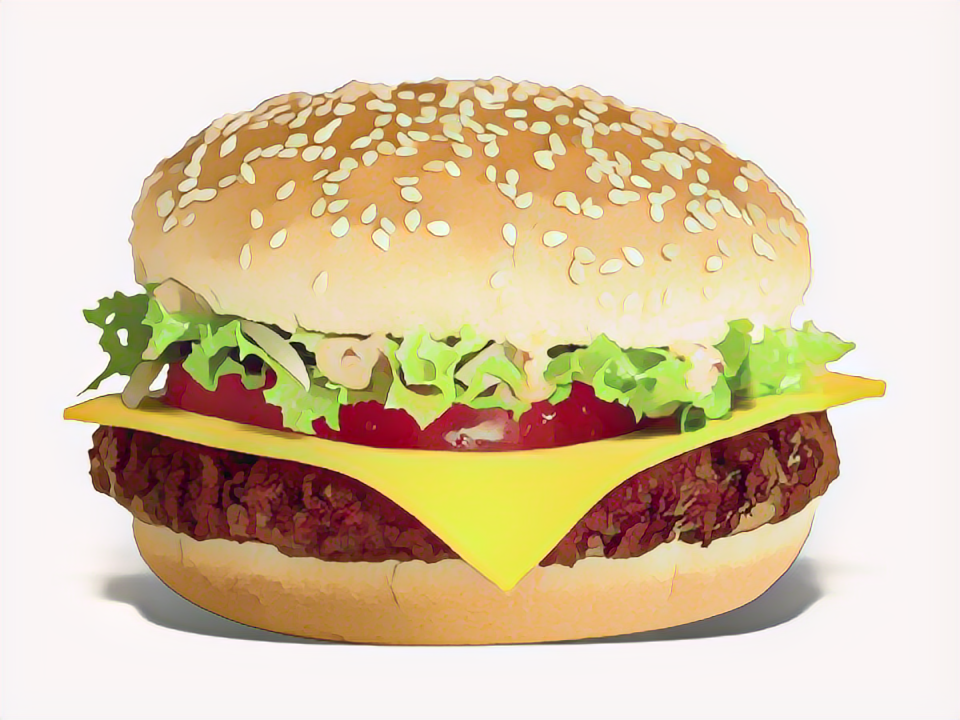

In [ ]:
if __name__ == '__main__':
    cartoon_img('test_images/burger.png', 'saved_models')

In [ ]:
def Display_cartoon(name):
  return Image("cartoon_images/" +  name)

In [ ]:
from IPython.display import Image
from google.colab.patches import cv2_imshow
from google.colab import files

#cv2_imshow("actress2.jpg")
#Image("cartoonized_images/jap.jpg")


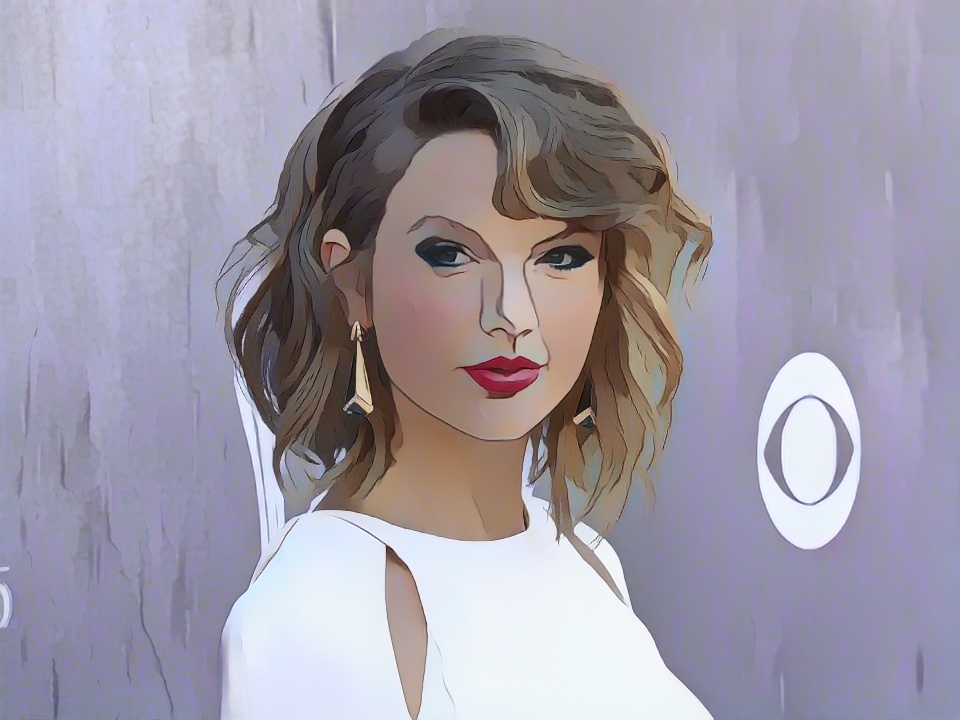

In [ ]:
Display_cartoon("taylor-swift.jpeg")

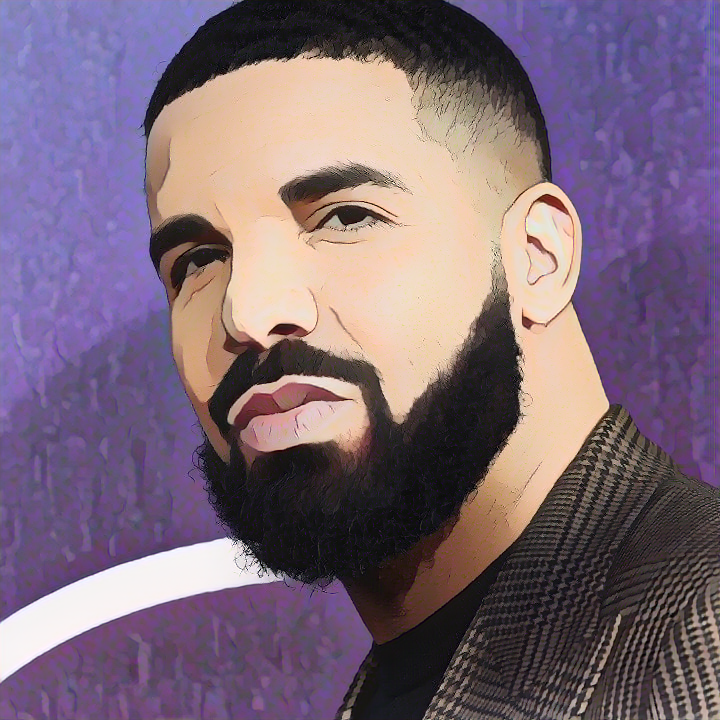

In [ ]:
Display_cartoon("drake.png")

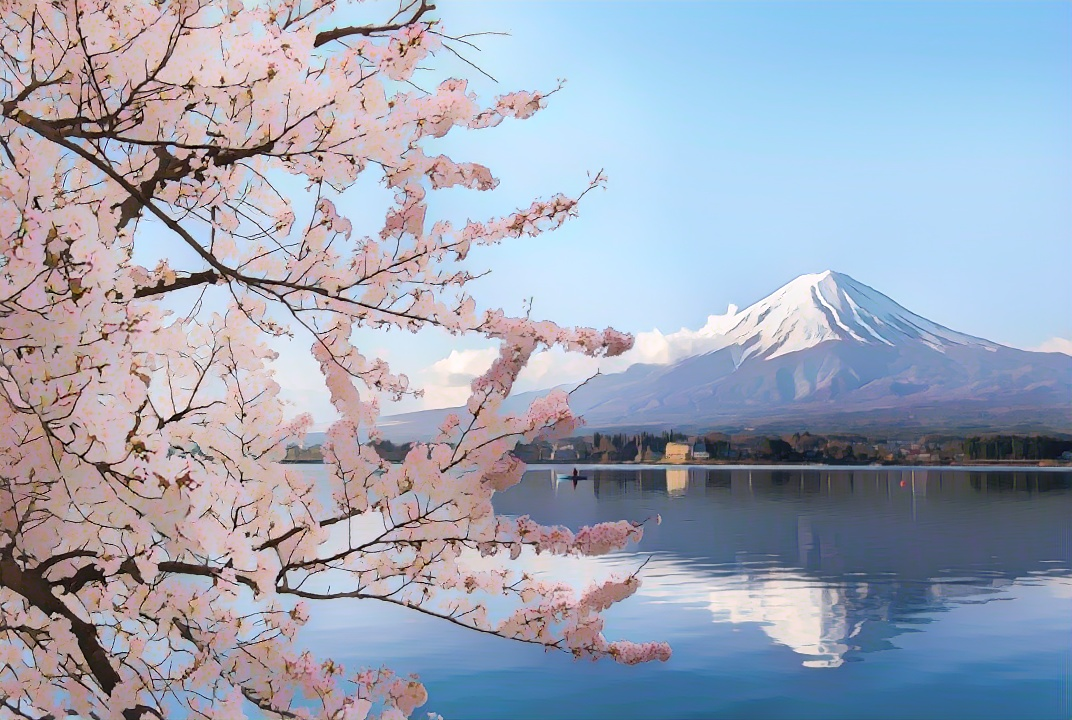

In [ ]:
Display_cartoon('jap.jpg')